## Taller 10: Entrega

Entregar link de de su taller # 10

Realice una nube de palabra sobre cualquier corpus (excepto el que usamos en la clase como ejemplo).

Puede subir link de Tableau Public o Jupyter Notebook.

### Se importan los datos frases de aliento

In [17]:
import pandas as pd 

data = pd.read_excel("C:/Users/usuario/Desktop/NLP/22_Febrero/Frases.xlsx")
data.head()

,Autor,Frase
0,Michael Jordan,A veces un ganador es simplemente un soñador q...
1,Didier Drogba,Creo mucho en el destino y creo que si algo no...
2,NaN,"Dale a cada día, la posibilidad de ser el mejo..."
3,Maestro Oogway (Kung Fu Panda),"El ayer es historia, el mañana es un misterio,..."
4,Pele,El éxito no es ningún accidente. Es trabajo du...


In [18]:
import numpy as np

from wordcloud import WordCloud, ImageColorGenerator

from nltk.corpus import stopwords
stopwords = stopwords.words("spanish")

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display


In [19]:
data.Frase

0     A veces un ganador es simplemente un soñador q...
1     Creo mucho en el destino y creo que si algo no...
2     Dale a cada día, la posibilidad de ser el mejo...
3     El ayer es historia, el mañana es un misterio,...
4     El éxito no es ningún accidente. Es trabajo du...
5     El hombre que se levanta es aún más grande que...
6     El talento gana partidos, pero el trabajo en e...
7             El trabajo duro vence al talento natural.
8     Es mi convicción que no hay límites para apren...
9     Hay una fuerza motriz más poderosa que el vapo...
10    He fallado más de 9000 tiros en mi carrera. He...
11    He fracasado una y otra vez en mi vida y es po...
12    Nunca consideres el estudio como una obligació...
13    Nunca digas nunca, porque los límites, como el...
14    Para aprender a triunfar, primero debes aprend...
15    Persevera en tu empeño y hallarás lo que busca...
16    Puedes tener todas las virtudes del mundo en l...
17    Si mantienes tu juego a un cincuenta por c

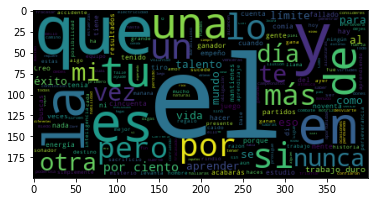

In [20]:
palabras = data.Frase.str.cat(sep=" ")
wordcloud = WordCloud().generate(palabras)

plt.imshow(wordcloud)
plt.show()


### Se eliminan palabras vacias 

In [49]:
import re 

stopwords.extend(["y", "la", "en", "que", "tu", "el"])

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    texto = " ".join(texto)
    return texto

data['pp'] = data.Frase.apply(lambda texto: pre_procesado(texto))

data.head()

,Autor,Frase,pp
0,Michael Jordan,A veces un ganador es simplemente un soñador q...,veces ganador simplemente soñador nunca rindió
1,Didier Drogba,Creo mucho en el destino y creo que si algo no...,creo destino creo si sucede razón
2,NaN,"Dale a cada día, la posibilidad de ser el mejo...",dale cada día posibilidad ser mejor día vida
3,Maestro Oogway (Kung Fu Panda),"El ayer es historia, el mañana es un misterio,...",ayer historia mañana misterio día hoy regalo l...
4,Pele,El éxito no es ningún accidente. Es trabajo du...,éxito ningún accidente trabajo duro perseveran...


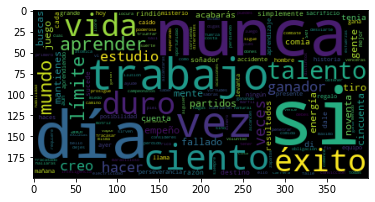

In [50]:
palabras = data.pp.str.cat(sep=" ")
wordcloud = WordCloud().generate(palabras)

plt.imshow(wordcloud)
plt.show()


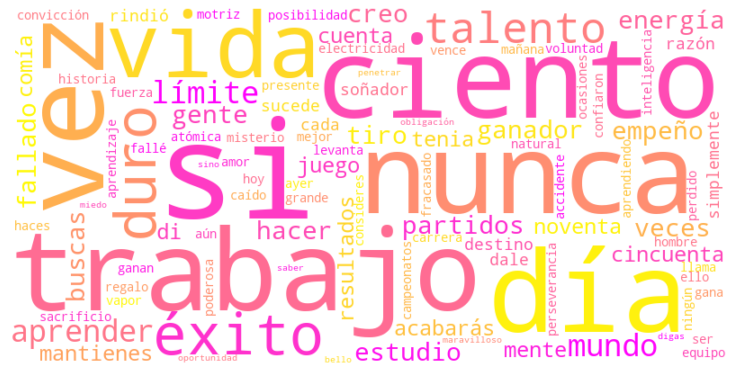

In [51]:
palabras = data.pp.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="spring",
                      stopwords=stopwords).generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()



### Cargar una imagen.

Para este caso seleccione una imagen del profesor super o,



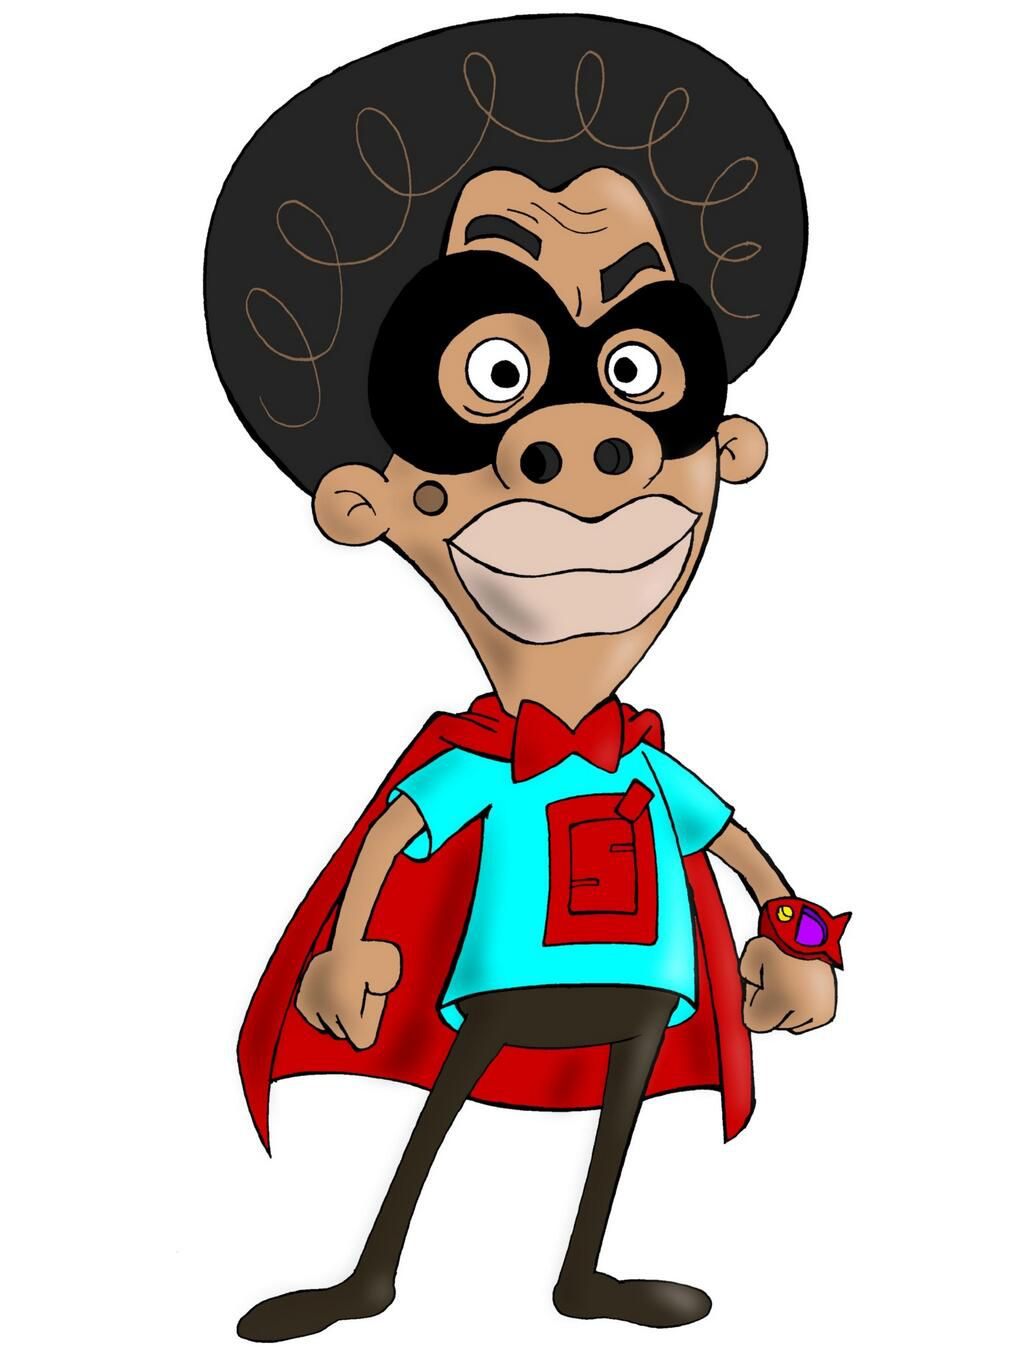

In [79]:
img = PIL.Image.open("C:/Users/usuario/Desktop/NLP/22_Febrero/Profe.jpg")
display(img)

In [80]:
mask = np.array(img)


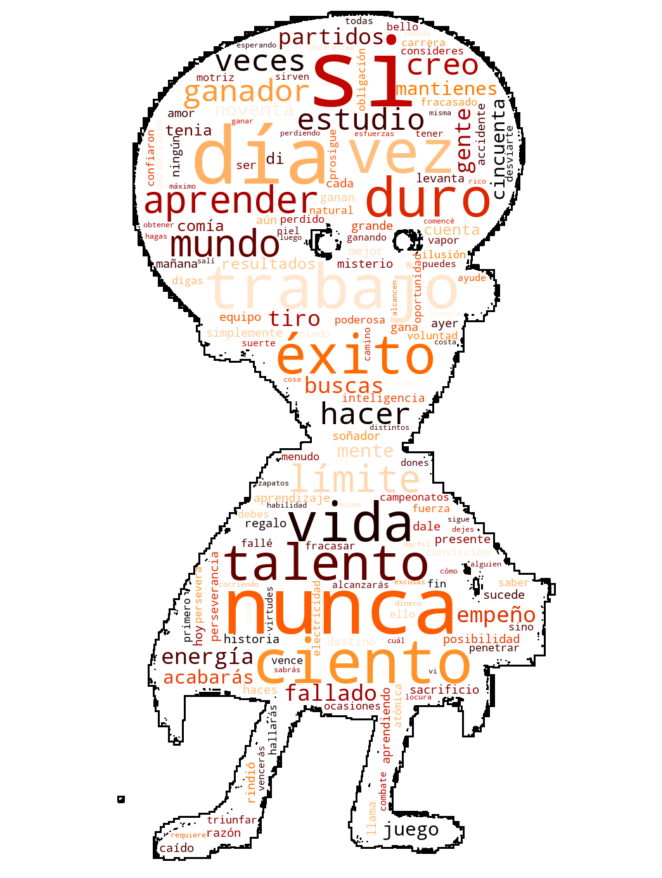

In [84]:
palabras = data.pp.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=250,
                      background_color="white", colormap='gist_heat',
                      stopwords=stopwords,
                      mask=mask, contour_width=4, contour_color='black').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

wordcloud.to_file("profesor_super_o.png")
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


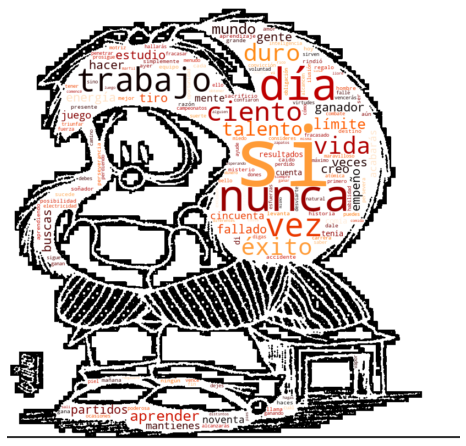

In [89]:
img_2 = PIL.Image.open("C:/Users/usuario/Desktop/NLP/22_Febrero/Mafalda.png")
mask_2 = np.array(img_2)
palabras = data.pp.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=250,
                      background_color="white", colormap='gist_heat',
                      stopwords=stopwords,
                      mask=mask_2, contour_width=4, contour_color='black').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

wordcloud.to_file("profesor_super_o.png")
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
